# Figure 3a and 3b
H<sub>2</sub>O-CO<sub>2</sub> saturation surfaces for: (a) one melt inclusion composition from La Palma (an ocean island basalt) at a range of pressures labeled in MPa; and (b) rhyolite, phonolite (silicic alkaline rock), nephelinite (highly alkali-rich basalt), and ocean island basalt (OIB) at 100 MPa and temperatures typical for these lavas: 900, 1000, 1200, and 1200 °C, respectively.

## About this notebook
This notebook uses VESIcal to compute solubility curves, numpy for some math, pandas to handle dataframes, and matplotlib to plot. Pickle is used to "pickle" (save) computed values to memory and read them back in such that the computations do not need to be run each time the script is run (e.g., if it is desired to only update the plots). If new calculations are desired, simply delete the '.p' files that should live in the same folder as this notebook, and the code will recompute and save new pickle files.

If the MagmaSat model is desired (the default model in VESIcal), the ENKI thermoengine must also be installed on your machine to run this notebook. That is a bit cumbersome, so you may choose to only install VESIcal (without ENKI thermoengine, which is a separate install), which will allow you to use any model within VESIcal except for MagmaSat.

In [3]:
import VESIcal as v
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import pickle

/opt/anaconda3/lib/python3.9/site-packages/numdifftools/extrapolation.py:10: DeprecationWarning: Please use `convolve1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve1d
/opt/anaconda3/lib/python3.9/site-packages/numdifftools/multicomplex.py:35: DeprecationWarning: `finfo.machar` is deprecated (NumPy 1.22)
  _TINY = np.finfo(float).machar.tiny


## Import Data and Define Notebook Settings

In [4]:
# Generic compositions
myfile = v.BatchFile('files/compositions.xlsx')

# Extract individual samples
samp_rhyolite = myfile.get_sample_composition("Mono Craters", asSampleClass=True)
samp_nephelenite = myfile.get_sample_composition("Nyiragongo", asSampleClass=True)
samp_phonolite = myfile.get_sample_composition("Erebus", asSampleClass=True)
samp_oib = myfile.get_sample_composition("LaPalma", asSampleClass=True)

# Set which model to use for each sample
rhyolite_model = "MagmaSat"
OIB_model = "MagmaSat"
nephelenite_model = "MagmaSat"
phonolite_model = "MagmaSat"

# Define plot colors for entire notebook
lc1 = '#B22221' # red
lc2 = '#0160C6' # blue
lc3 = '#FF8C03' # orange
lc4 = '#800080' #purple

## Isobars and isopleths for La Palma MI
Use the OIB composition from La Palma (samp_oib)

In [5]:
try:
    with open('pickle/lapalma_MI_isobars_all.pickle', 'rb') as handle:
        lapalma_MI_isobars_all = pickle.load(handle)

except:
    lapalma_MI_isobars_all, lapalma_MI_isopleths_all = v.calculate_isobars_and_isopleths(sample=samp_oib, pressure_list=[1000, 2000, 4000, 6000, 8000], temperature=1200, model=OIB_model).result

    with open('pickle/lapalma_MI_isobars_all.pickle', 'wb') as handle:
        pickle.dump(lapalma_MI_isobars_all, handle)

### Degassing Path for La Palma

In [6]:
degassing = v.calculate_degassing_path(sample=samp_oib, temperature=1200, model=OIB_model).result

Finding saturation point... duanDriver-2: t = 1473.15, p = 11000, z = 3.27682, v = 3.64873, delv = 0, dx = -6.38855e-14, iter = 40
duanDriver-2: t = 1473.15, p = 7700, z = 2.7002, v = 4.29524, delv = 0, dx = -2.35539e-14, iter = 41
duanH2ODriver(b): t = 1473.15, p = 7600, z = 1.71147, v = 2.75828, delv = 0, dx = -2.75851e-14, iter = 39
duanDriver-2: t = 1473.15, p = 7400, z = 2.68781, v = 4.44885, delv = 0, dx = -4.08904e-14, iter = 40
duanDriver-2: t = 1473.15, p = 7400, z = 2.68709, v = 4.44766, delv = 0, dx = -1.6226e-13, iter = 38
duanDriver-2: t = 1473.15, p = 7400, z = 2.68709, v = 4.44766, delv = 0, dx = -1.6226e-13, iter = 38
duanDriver-2: t = 1473.15, p = 7470, z = 2.70093, v = 4.42868, delv = 0, dx = -4.71619e-14, iter = 40
[=                   ] 8% Calculating degassing path...duanDriver-2: t = 1473.15, p = 6980.8, z = 2.60811, v = 4.57618, delv = 0, dx = -2.5455e-14, iter = 39
duanDriver-2: t = 1473.15, p = 6980.8, z = 2.60811, v = 4.57618, delv = 0, dx = -5.091e-14, iter =

## Plot Figure 3a

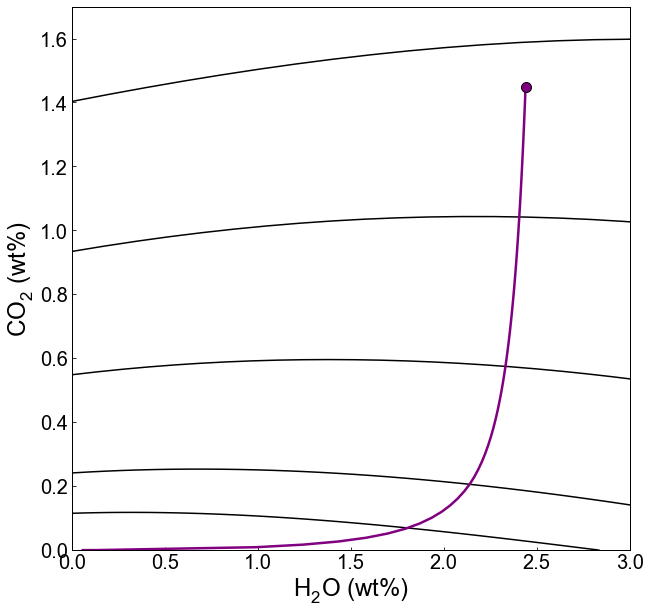

In [7]:
v.vplot.smooth_isobars_and_isopleths(isobars=lapalma_MI_isobars_all)

fig, ax = v.plot(isobars=lapalma_MI_isobars_all, degassing_paths=[degassing])
ax.tick_params(axis='x', labelsize=20, direction='in')
ax.tick_params(axis='y', labelsize=20, direction='in')
plt.xticks(fontname='Arial')
plt.yticks(fontname='Arial')
plt.xlabel(r'H$_2O$ (wt%)', fontsize=24, family='Arial')
plt.ylabel(r'CO$_2$ (wt%)', fontsize=24, family='Arial')

# set all line colors to be the same
for i in range(7):
    ax.properties()['children'][i].set_color("black")

# set properties of degassing path line
ax.properties()['children'][6].set_linestyle('-')
ax.properties()['children'][6].set_linewidth(2.5)
ax.properties()['children'][6].set_color(lc4)
ax.properties()['children'][7].set_color(lc4)
ax.properties()['children'][7].set_markeredgecolor("black")

# set plot and axis options
ax.set_xlim(left=0, right=3)
ax.set_ylim(bottom=0, top=1.7)

ax.get_legend().remove()
fig.set_figwidth(10)
fig.set_figheight(10)
plt.show()

fig.savefig('LaPalma_Isobars.png', dpi=400)   # save the figure to file


In [8]:
try:
    with open('pickle/rhyolite_isobars.pickle', 'rb') as handle:
        rhyolite_isobars = pickle.load(handle)
except:
    rhyolite_isobars, rhyolite_isopleths = v.calculate_isobars_and_isopleths(sample=samp_rhyolite, pressure_list=1000, temperature=900, isopleth_list=[0, 0.25, 0.5, 0.75, 1], model=rhyolite_model).result
    with open('pickle/rhyolite_isobars.pickle', 'wb') as handle:
        pickle.dump(rhyolite_isobars, handle)
try:
    with open('pickle/oib_isobars.pickle', 'rb') as handle:
        oib_isobars = pickle.load(handle)
except:
    oib_isobars, oib_isopleths = v.calculate_isobars_and_isopleths(sample=samp_oib, pressure_list=1000, temperature=1200, isopleth_list=[0, 0.25, 0.5, 0.75, 1], model=OIB_model).result
    with open('pickle/oib_isobars.pickle', 'wb') as handle:
        pickle.dump(oib_isobars, handle)
try:
    with open('pickle/nephelenite_isobars.pickle', 'rb') as handle:
        nephelenite_isobars = pickle.load(handle)
except:
    nephelenite_isobars, nephelenite_isopleths = v.calculate_isobars_and_isopleths(sample=samp_nephelenite, pressure_list=1000, temperature=1200, isopleth_list=[0, 0.25, 0.5, 0.75, 1], model=nephelenite_model).result
    with open('pickle/nephelenite_isobars.pickle', 'wb') as handle:
        pickle.dump(nephelenite_isobars, handle)
try:
    with open('pickle/phonolite_isobars.pickle', 'rb') as handle:
        phonolite_isobars = pickle.load(handle)
except:
    phonolite_isobars, phonolite_isopleths = v.calculate_isobars_and_isopleths(sample=samp_phonolite, pressure_list=1000, temperature=1000, isopleth_list=[0, 0.25, 0.5, 0.75, 1], model=phonolite_model).result
    with open('pickle/phonolite_isobars.pickle', 'wb') as handle:
        pickle.dump(phonolite_isobars, handle) 

## Plot Figure 3b

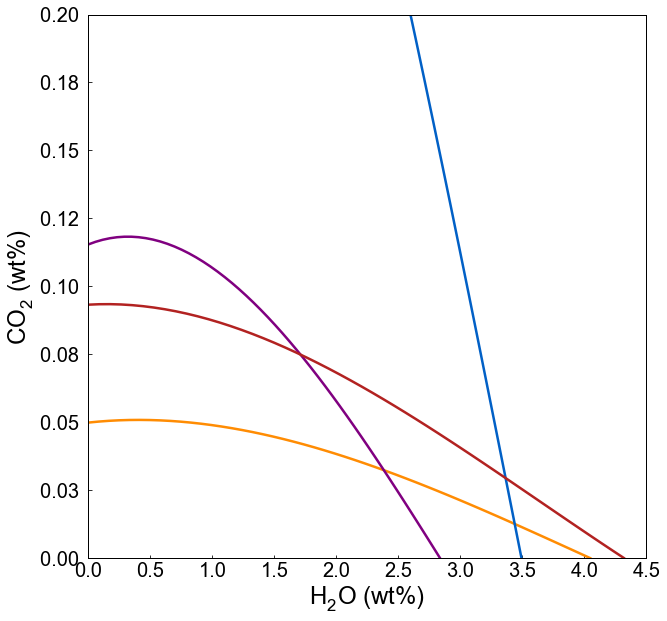

In [9]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(rhyolite_isobars['H2O_liq'], rhyolite_isobars['CO2_liq'], color=lc3, linewidth=2.5)
ax.plot(oib_isobars['H2O_liq'], oib_isobars['CO2_liq'], color=lc4, linewidth=2.5)
ax.plot(nephelenite_isobars['H2O_liq'], nephelenite_isobars['CO2_liq'], color=lc2, linewidth=2.5)
ax.plot(phonolite_isobars['H2O_liq'], phonolite_isobars['CO2_liq'], color=lc1, linewidth=2.5)

plt.xlabel(r'H$_2O$ (wt%)', fontsize=24, family='Arial')
plt.ylabel(r'CO$_2$ (wt%)', fontsize=24, family='Arial')

# Font settings
font = {'weight': 'normal',
        'size': 16,
        'family': 'Arial'
        }

# Plot settings
ax.set_xlim(left=0, right=4.5)
ax.set_ylim(bottom=0, top=0.2)
ax.tick_params(axis='x', labelsize=20, direction='in')
ax.tick_params(axis='y', labelsize=20, direction='in')

plt.xticks(fontname='Arial')
plt.yticks(fontname='Arial')

ax.yaxis.set_major_formatter('{x:<5.2f}')

fig.savefig('H2O_CO2_isobars.png', dpi=400)   # save the figure to file

plt.show()